> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# El arte de medir I




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\bn}{{\bf n}} $
$ \newcommand{\bsig}{\boldsymbol{\sigma}} $


In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

In [2]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute, transpile 
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector


## Medidas de 1 cúbit

### Medidas en la base computacional

El **aparato de medida estándar** en computación cuántica asigna valores $\{0,1\}$ a los kets $\ket{0}$ y $\ket{1}$ de la base computacional





::::{figure} images/cubit_meter2.png
:width: 250px
:align: center
::::

donde $a = 0,1$ 

En general, el estado es destruido en la medida, por lo que se suele omitir el hilo cuántico a su salida

::::{figure} images/cubit_meter1.png
:width: 300px
:align: center
::::


Se trata de una *medida proyectiva* a la que asociamos el observable $Z = \sigma_z $. 


$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 


Podemos unificar ambos resultados como: $~Z\ket{a} = (-1)^a\ket{a}$, 
con  $a=\{0,1\}$.

### Medidas en un simulador

Se trata de un programa clásico que **simula** un circuito cuántico utilizando las leyes de la Mecánica Cuántica 

El resultado de un circuito calculado con $qasm\_simulator$ sólo se puede obtener mediante un aparato de medida que, usado repetidas veces nos permitirá reconstruir el estado de manera estadística.

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


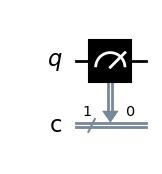

{'0': 1000}


In [3]:
' hay que elegir un método de ejecución del circuito(backend), puede ser real, o simulado'
M_simulator = Aer.get_backend('qasm_simulator')

qc=QuantumCircuit(1,1)
#qc.x(0)
#qc.h(0)
#qc.u(np.pi/3,np.pi/5,0,0)
qc.measure(0,0)

display(qc.draw('mpl'))

# opción 1
job=execute(qc,backend=M_simulator,shots=1000) 
result=job.result()
counts=result.get_counts()

# opción 2
#qcobj = transpile(qc, M_simulator )      # Crea un objeto compilado a partir del circuito  
#job = M_simulator.run(qcobj, shots=2048) # Hacemos la simulación 2048 veces 
#resultado=job.result()
#counts=resultado.get_counts()

'escribimos las cuentas'
print(counts)

Visualizamos el resultado mediante un histograma

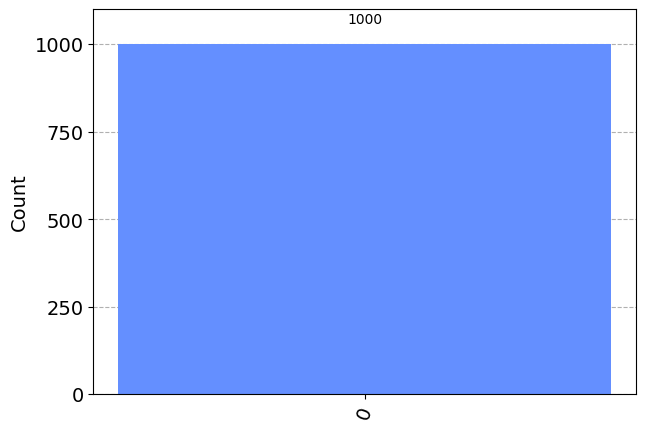

In [4]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

### Tomografía Cuántica

Una repetición de medidas de un estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$ permite tener acceso estadístico a las amplitudes de probabilidad 



$$
p(0) = \frac{n_{0}}{N} = |c_0|^2 = |\braket{0}{\psi}|^2~~~~~~~~~~~~~~~~ p(1) = \frac{n_{1}}{N}=|c_1|^2 =  |\braket{1}{\psi}|^2 \, .
$$


Este procedimiento de reconstrucción es la base de la **tomografía cuántica**.

Definamos un vector aleatorio

In [5]:
psi_state= tQ.random_ket(2).reshape(2)
display(Statevector(psi_state).draw('latex'))
#display(Statevector(psi_state).draw('Bloch'))

<IPython.core.display.Latex object>

Las probabilidades de obtener '0' y '1' son los cuadrados de las amplitudes

In [6]:
p0 = np.abs(psi_state[0])**2
p1 = np.abs(psi_state[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))


p(0)= 0.5076 , p(1)= 0.4924


Vamos a recuperarlas *experimentalmente* corriendo un circuito. Primero obtenemos el diccionario de cuentas

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


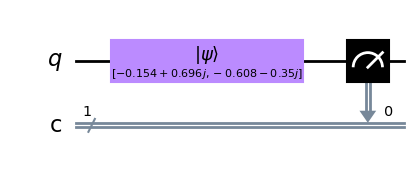

counts_psi =  {'0': 507008, '1': 492992}


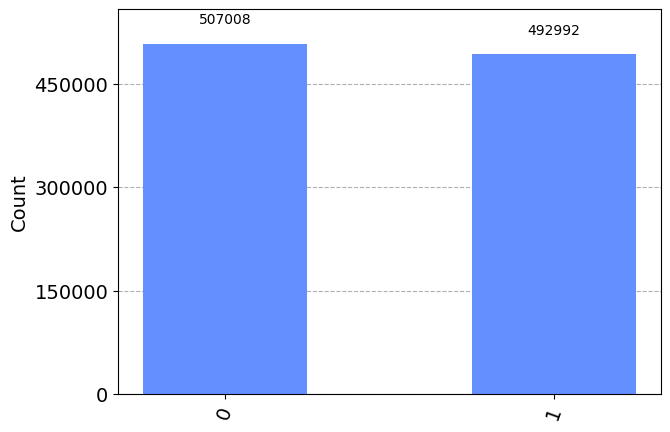

In [7]:
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.measure(0,0)
display(qc_psi.draw('mpl'))

nshots = 1000000
counts_psi = execute(qc_psi,M_simulator,shots=nshots).result().get_counts()
print('counts_psi = ',counts_psi)

plot_histogram(counts_psi) # Mostramos un histograma de resultados

Ahora podemos  calcular las frecuencias relativas $n_i/N$  y compararlas con las probabilidades $p(i)$

In [8]:
p0_exp = counts_psi['0']/nshots
p1_exp = counts_psi['1']/nshots

print('p(0)_exp =', p0_exp,'  p(1)_exp = ',p1_exp)

p(0)_exp = 0.507008   p(1)_exp =  0.492992


### Medidas en un ordenador cuántico real



Una vez que hemos verificado que el programa 
corre bien en nuestro simulador, podemos lanzarlo a un ordenador cuántico real sin más que cambiar el *backend*.

Por el momento usaremos los ordenadores gratuitos de IBM. Para ello es necesario hacer una cuenta de usuario
en https://quantum-computing.ibm.com/ 

Go to https://quantum-computing.ibm.com/account and get API-token in the MyAccount section. Copy token and paste in the following cell in between the brackets (after uncommenting the line)


In [9]:
#uncomment and paste your token
#IBMQ.save_account('')

After that, your token is saved in this computer. In order to load the account just type

In [10]:
from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# provider.backends()

antes de enviar un trabajo es conveniente consultar qué máquina de las adecuadas a nuestras necesidades es la que está más libre

In [11]:
# from qiskit.providers.ibmq import least_busy
# IBMQ_best_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 
#                                       and not x.configuration().simulator 
#                                       and x.status().operational==True))
# print("least busy backend: ", IBMQ_best_backend)

Ahora compilamos y enviamos el trabajo

In [12]:
# qobj = transpile(qc_psi, IBMQ_best_backend)           # Compila el código para el backend
# job = IBMQ_best_backend.run(qobj, shots=1024) # Hacemos la simulación 1024 veces 

podemos monitorizar la ejecución

In [13]:
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

extraemos el resultado

In [14]:
# counts = job.result().get_counts()
# print("Cuentas=",counts)

In [15]:
# plot_histogram(counts)

### Ejemplo: la moneda cuántica

El resultado de tirar una moneda al aire es una variable aleatoria binaria  equiprobable:  X = (cara,cruz). 

Es irrelevante si analizamos el resultado cada tirada o cada dos, o tres tiradas. Las frecuencias relativas de caras y cruces, siempre serán próximas a $1/2$. 

Podemos imaginar un experimento similar con un cúbit, donde cara $\to \ket{0}$ y cruz $\to\ket{1}$ son los estados posibles de la medida en la base $Z$.

Tirar la moneda  clásica es ponerla en un estado que puede ser cara o cruz al caer sobre la mesa 

Tirar la moneda cuántica  es aplicar el operador $H$  para poner cualquiera de los dos resultados en una superposición 
$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$ y $H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$ 


Ahora no es lo mismo medir el resultado después de una tirada

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = p(1) = 0.5
$$
que hacerlo después de dos tiradas

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm tirar}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


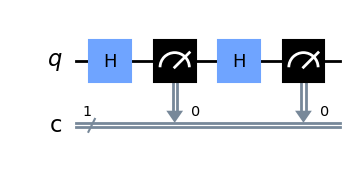

In [16]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

Ejecutemos el circuito con y sin medición intermedia

In [17]:
M_simulator = Aer.get_backend('qasm_simulator')

execute(qc,M_simulator).result().get_counts()

{'1': 517, '0': 507}

La medición intermedia destruye la superposición y hace colapsar el estado a $\ket{0}$  ó $\ket{1}$. 

Sin dicha medición, las amplitudes de probabilidad para obtener $\ket{1}$ a partir de $\ket{0}$ interfieren destructivamente

## Medidas en una base general

::::::{admonition} Nota (Recuerda) 
:class: note

<center>
No importa en qué dirección apunte el eje $\hat{\bf n} $ de un Stern-Gerlach 
   
    
$$~ \Downarrow ~$$

a la salida <b>siempre</b> mediremos $\pm 1$ (deflexión positiva o negativa)


$$~ \Downarrow ~$$
    
si no se destruye, el estado posterior será $\ket{\pm,\hat{\bf n}}$ en cada caso
</center>
::::::


Supongamos que un estado $\ket{\psi}$ entra en el detector con un campo ${\bf B}$ orientado en la dirección


$$
\hat\bn(\theta,\phi) = \sin\theta\cos\phi \, \hat {\bf x} + \sin\theta\sin\phi \, \hat {\bf y} + \cos\theta \, \hat {\bf z}
$$




A la salida, el resultado $+1$ indicará que el $\ket{\psi}$ ha colapsado al estado

$$
\ket{\psi} \stackrel{+}{\longrightarrow} \ket{+,\hat\bn} = ~\begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  ~e^{i\phi}\sin\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~,~~~~~
~~~~~\hbox{con probabilidad} ~~~~~ p_{\hat\bn}(+) = |\braket{+,\hat\bn}{\psi}|^2
$$



A la salida, el resultado $-1$ indicará que el $\ket{\psi}$ ha colapsado al estado

$$
\ket{\psi} \stackrel{-}{\longrightarrow} \ket{-,\hat\bn} =  \begin{bmatrix} -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \\  \cos\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~,~~~~~
~~~~~\hbox{con probabilidad} ~~~~~ p_{\hat\bn}(-) = |\braket{-,\hat\bn}{\psi}|^2
$$



Para adaptar la discusión al *contexto computacional*, $\ket{+}\to \ket{0}, \ket{-}\to \ket{1}$  vamos a unificar la notación 



$$
\ket{+, \hat{\bf n}} \to \ket{0}_{\hat{\bf n}} ~~~~~,~~~~~\ket{-, \hat{\bf n}}\to  \ket{1}_{\hat{\bf n}} 
$$


Con esta notación, la ecuación de autovalores

$$
\hat {\bf n} \cdot \boldsymbol{\sigma}\,  \ket{\pm, \hat{\bf n}} =  \pm \, \ket{\pm, \hat{\bf n}} 
$$

se escribe 

$$
\hat {\bf n} \cdot \bsig\,  \ket{a}_{\hat{\bf n}}~ =~   (-1)^a \ket{a}_{\hat{\bf n}}~~~~~~a = 0,1
$$



Sea $~\hat{\bf z}\cdot \bsig ~$ el <u>*aparato de medida estandar*</u> orientado a lo largo del eje $~\hat{\bf z}$

$$
 \hat{\bf z}\cdot \bsig \,  \ket{a}_{\hat{\bf z}} = (-1)^a\ket{a}_{\hat{\bf z}} = Z \ket{a} 
$$


y  $~\hat\bn\cdot \bsig~$ el <u>aparato de medida orientado</u> a lo largo del eje $\hat\bn$


$$
\hat\bn\cdot \bsig \,  \ket{a}_{\hat{\bf n}} = (-1)^a\ket{a}_{\hat{\bf n}}
$$


ambas situaciones está  relacionadas mediante una simple *rotación*

::::{figure} images/BlochSphere_basis.png
:width: 300px
:align: center
::::


El operador que implementa esta rotación en el espacio $\Hil = {\mathbb C}^2$ de un cúbit es



$$
U(\hat {\bf z}\to \hat \bn) = U(\theta,\phi,0)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & -  \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i\phi} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$



que implementa el  *cambio de base* $\{\ket{a}_{\hat{\bf z}}\}$ a la base $\{\ket{a}_{\hat{\bf n}}\}, ~a = 0,1$ 


$$
\ket{0}_{\hat\boldn} = U \ket{0}_{\hat{\bf z}}~~~~~~,~~~~~~
\ket{1}_{\hat\boldn} = U \ket{1}_{\hat{\bf z}}
$$




es decir 

$$ 
\begin{bmatrix} \cos\theta \\ e^{i\phi}\sin\theta \end{bmatrix} = U\cdot \begin{bmatrix}1\\0 \end{bmatrix} ~~~~~~~,~~~~~~~
\begin{bmatrix} -\sin\theta \\ e^{i\phi}\cos\theta \end{bmatrix} = U\cdot \begin{bmatrix}0\\1 \end{bmatrix}  
$$

Si las componentes de los vectores rotan en la forma $\ket{a}_{\hat{\bf n}} = U\ket{a}_{\hat{\bf z}}$
los observables asociados a los  aparatos de *Stern Gerlach*: *original* $\to \hat {\bf z} \cdot \bsig~$, y *rotado*$\to\hat {\bf n} \cdot \bsig~ $, se relacionan algebraicamente *como lo hace cualquier operador*

$$
\hat {\bf n} \cdot \bsig =  U \, (\hat {\bf z} \cdot \bsig)\,  U^\dagger
$$
:::{dropdown} Verificamos la consistencia
\begin{eqnarray}
\hat {\bf n} \cdot \bsig\,  \ket{a}_{\hat{\bf n}} ~~&=&~~ 
U~ \hat {\bf z} \cdot \bsig ~  U^\dagger ~ U  \ket{a}_{\hat{\bf z}}\\  \rule{0mm}{8mm}
&=& U~ \hat {\bf z} \cdot \bsig ~   \ket{a}_{\hat{\bf z}}\\   \rule{0mm}{8mm}
&=& U\, Z \ket{a} = U (-1)^a \ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=&  (-1)^a U\ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=& (-1)^a \ket{a}_{\hat{\bf n}}  \rule{0mm}{8mm}
\end{eqnarray}
:::


::::::{admonition} Ejercicio
:class: tip


verifica esta ecuación operando

::::::


El circuito siguiente  *simula* un aparato de medición en la base $\{\ket{a}_{\hat{\bf n}}\}$
obtenido mediante la rotación del aparato de medida en la base $\{\ket{a}_{\hat{\bf n}}\}$ de autoestados de $Z$ 


::::{figure} images/nbasis_measure2.png
:width: 500px
:align: center
::::


::::::{admonition} Nota
:class: note



Recuerda que el orden de la composición de operadores se invierte al plasmarlos en un circuito

::::::


### Ejemplo: bases $X$, $Y$ y $Z$



La base computacional es la base de autoestados de $Z$  

$$\{\ket{0},\ket{1} \} = \{\ket{0}_{\hat{\bf z}},\ket{1}_{\hat{\bf z}}\}$$


Muy frecuentes son otras bases ortonormales como la base de autoestados de $X$


$$ \{\ket{+},\ket{-}\}  = \{\ket{0}_{\hat{\bf x}},\ket{1}_{\hat{\bf x}}\} $$

o la base de autoestados de $Y$

$$ \{\ket{+i},\ket{-i}\}  = \{\ket{0}_{\hat{\bf y}},\ket{1}_{\hat{\bf y}}\} $$



Para construir un medidor asociado a las bases $X$ e $Y$ sólo es necesario *rotar* el aparato de medida estándar asociado a la base $Z$ 



$$ \ket{\pm} =  \ket{a}_{\hat{\bf x}} =  H \ket{a}_{\hat{\bf z}} ~~~~ $$

$$ \ket{\pm i} = \ket{a}_{\hat{\bf y}} =  SH \ket{a}_{\hat{\bf z}} $$  
 

::::::{admonition} Ejercicio
:class: tip

Comprueba  que estas ecuaciones de cambio de base son correctas
::::::


Con estas relaciones podemos realizar medidas asociadas a dichas bases



$$
\hat {\bf x} \cdot \bsig =  H \, (\hat {\bf z} \cdot \bsig)\,  H
$$



$$
\hat {\bf y} \cdot \bsig =  SH \, (\hat {\bf z} \cdot \bsig)\,  HS^\dagger
$$


los circuitos que implementan la rotación de estos operadores 


::::{figure} images/meter_xybasis.png
:width: 700px
:align: center
::::


que nos permiten definir  *aparatos de medida rotados* en las direcciones $x$ e $y$


::::{figure} images/meter_xybasis2.png
:width: 700px
:align: center
::::


Cuando sólo nos interesa el resultado de la medida, y no el estado posterior al que ha colapsado no es necesario añadir los operadores posteriores al observable $Z$.


::::::{admonition} Ejercicio
:class: tip

En la figura observamos el resultado de hacer pasar una nube de electrones a través de tres detectores de Stern Gerlach perpendiculares.


    
![picture](https://upload.wikimedia.org/wikipedia/commons/c/cb/Stern-Gerlach_Analyzer_Sequential_Series_E3.png "blog-image align")
    
 Reproduce ese experimento en un circuito. Toma el eje $Y$ como eje de propagación orienta los detectores sucesivamente a lo largo de $Z$, y $X$ y $Z$ de nuevo. 
    
Ejecuta el circuito lanzando los electrones de 1 en 1 en un estado inicial arbitrario y observa los resultados intermedios. 
    
Lanza ahora una nube de electrones y observa la estadística    
::::::


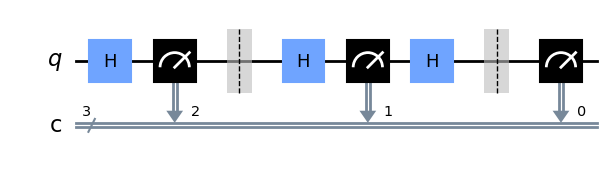

{'010': 1}

In [18]:
'solucion'
qc = QuantumCircuit(1,3)

qc.h(0)

qc.measure(0,2)

qc.barrier()
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)

display(qc.draw('mpl'))

execute(qc,M_simulator,shots=1).result().get_counts()



Definamos una función que ejecuta medidas en cualquiera de los tres ejes

In [19]:
def measure_XYZ(qc,axis="Z",shots=1024):
    'needs execute'
    import copy 
    qc0 = copy.deepcopy(qc)
    if axis == "Z":
        qc0.measure(0,0)
    if axis == "X":
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
    elif axis == "Y":
        qc0.sdg(0)
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
        qc0.s(0)
        
    counts=execute(qc0,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    
    return counts

Ahora podemos observar el resultado de medidas sucesivas a lo largo de ejes diferentes

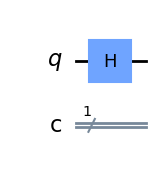

cuentas(base Z)= {'0': 4951, '1': 5049}
cuentas(base X)= {'0': 10000}
cuentas( base Y)= {'0': 4934, '1': 5066}


In [20]:
shots = 10000

qc = QuantumCircuit(1,1)
qc.h(0)
display(qc.draw('mpl'))

cuentasz = measure_XYZ(qc,axis="Z",shots=shots)
print("cuentas(base Z)=",cuentasz)

cuentasx = measure_XYZ(qc,axis="X",shots=shots)
print("cuentas(base X)=",cuentasx)

cuentasy = measure_XYZ(qc,axis="Y",shots=shots)
print("cuentas( base Y)=",cuentasy)


## Valores esperados

Cualquier *observable* sobre un cúbit $A = A^\dagger$ puede expresarse en la base $\sigma_i = \{I,X,Y,Z\}, \, i=0,1,2,3$

$$
A = a_0 I + a_1 X + a_2 Y  + a_3 Z \, . 
$$


Los coeficientes se obtienen haciendo uso de la relación $\to \frac{1}{2}\tr\,  (\sigma_i \sigma_j) = \delta_{ij}$. Es decir

$$
a_i = \frac{1}{2} \tr \, (A \sigma_i)
$$

donde $ (\sigma_0,\sigma_1,\sigma_2,\sigma_3) = (I,X,Y,Z).$


    
:::{dropdown} Comprobación
$$
\frac{1}{2} \tr \, (A \sigma_i) = \frac{1}{2} \tr \, \left((\sum_{j=0}^3 a_j \sigma_j) \sigma_i\right)
= \sum_{j=0}^3 a_j \, \frac{1}{2} \tr ( \sigma_j \sigma_i) = \sum_{j=0}^3 a_j \delta_{ji} = a_i
$$
    
:::


Entonces, podremos obtener el valor esperado de $A$  si somos capaces de medir los de $X,$ $Y$ y $Z$.

\begin{eqnarray*}
\langle A\rangle_\psi =\bra{\psi}A\ket{\psi} &=& 
\bra{\psi} a_0 I + a_1 X + a_2 Y  + a_3 Z \ket{\psi} \\ \rule{0mm}{6mm}
&=& a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}


### Calculo del $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$ y $\langle Z\rangle_\psi$

Comenzamos inicializando el circuito en un estado $\ket{\psi}$

<IPython.core.display.Latex object>

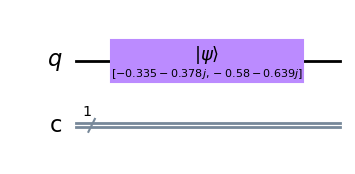

In [21]:
psi_state= tQ.random_ket(2).reshape(2)
display(Statevector(psi_state).draw('latex'))
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.draw('mpl')

- $\langle Z \rangle_{\psi}$

Los estados de la base computacional son autoestados del operador $Z$ con autovalor $\pm 1$


$$
Z \ket{0} =+ \ket{0}   ~~~~~~~~~~~~~~~~~~~~~ Z \ket{1} =-\ket{1} 
$$


Dado un estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$, la medida repetida arroja de forma aleatoria los valores propios de $Z \to \pm 1$ con frecuencias relativas 


$$(+1)\to n^Z_0 ~~~~~~~~~~~~~~~~~~~~~~~~ (-1)\to n^Z_1$$ 

Por definición, el valor medio de dicha variable es, 

\begin{eqnarray*}
\langle Z \rangle_\psi = \bra{\psi} Z \ket{\psi} 
&=& \left( c^Z_0\bra{0} + c^Z_1\bra{1}\right) Z\left( c^Z_0\ket{0} + c^Z_1\ket{1}\right)  \nonumber \\  \rule{0mm}{10mm}
&=& (+1) |c^Z_0|^2 + (-1) |c^Z_1|^2    \nonumber \\  \rule{0mm}{10mm}
&=& +\frac{n^Z_0}{N}- \frac{ n^Z_1}{N}
\end{eqnarray*}


Para medir autovalores de $\langle Z\rangle_\psi$ el circuito es el más simple




::::{figure} images/cubit_meter1.png
:width: 300px
:align: center
::::


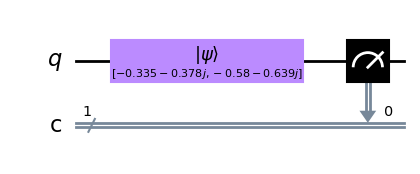

{'1': 7467, '0': 2533}

In [22]:
'añadimos el medidor, trabajaremos con una copia del circuito'
import copy
qc_psi_copy = copy.deepcopy(qc_psi)
qc_psi_copy.measure(0,0)
display(qc_psi_copy.draw('mpl'))

shots = 10000
counts_psi = execute(qc_psi_copy,M_simulator,shots = shots).result().get_counts()
display(counts_psi)

Ahora que tenemos las frecuencias relativas de los autovalores $\pm 1$ de $Z$, podemos calcular los valores medios

In [23]:
mean_Z = 0

for bits, counts  in counts_psi.items():
    mean_Z += (-1)**(int(bits))* (counts/shots)

print('<Z> =',np.round(mean_Z,5))

<Z> = -0.4934


- $\langle X \rangle_{\psi}$

En la base $X$, **el mismo estado** de entrada se escribirá con otras componentes $\ket{\psi} = c_0^X\ket{+} + c_1^X\ket{-}$.

Si ahora medimos $\ket{\psi}$ en la base $X$, la repetición arrojará  una muestra aleatoria de autovalores de $X\to \pm 1$ con frecuencias 

$$~(+1)\to n^X_0  ~~~~~~~~~~~~~~~~~~~ (-1)\to n^X_1  $$

El valor esperado de $X$  se obtiene del promedio de frecuencias *relativas*

$$
\langle X \rangle_\psi ~= (+1)|c_0^X|^2 +(-1)|c_1^X|^2 ~=~ +\frac{n^X_0}{N}- \frac{ n^X_1}{N}
$$



Ya hemos visto cuál es el circuito necesario para  medir en la base $X$ 



::::{figure} images/cubit_meter_xbasis.png
:width: 400px
:align: center
::::


::::::{admonition} Ejercicio
:class: tip

En un estado arbitrario, $\ket{\psi}$, y calcula el valor esperado $\langle X\rangle_\psi = \bra{\psi}X\ket{\psi}$
::::::


- $\langle Y \rangle_{\psi}$


Igualmente, si medimos el estado $\ket{\psi} = c_0^Y\ket{+i} + c_1^Y\ket{-i}$ con un medidor asociado al operador $Y = SHZHS^\dagger$, la repetición arrojará  una muestra aleatoria de valores propios de $Y\to \pm 1$ con frecuencias relativas $+1\to n^Y_0$ y $-1\to n^Y_1$. Entonces

$$
\langle Y \rangle_\psi = +\frac{n^Y_0}{N}- \frac{ n^Y_1}{N}\, .
$$



Circuito necesario para medir en la base $ Y$ 


::::{figure} images/cubit_meter_ybasis.png
:width: 400px
:align: center
::::


::::::{admonition} Ejercicio
:class: tip

Calcula el valor esperado $\langle Y\rangle_\psi = \bra{\psi}Y\ket{\psi}$
::::::


::::::{admonition} Ejercicio
:class: tip

Genera un observable arbitrario $A$ y calcula el valor esperado $\bra{\psi}A\ket{\psi}$
::::::


### Valor esperado de un operador unitario

Supongamos que sabemos cómo preparar, mediante un circuito, el estado $\ket{\psi}$ a partir del estado $\ket{0}$. 

$$\ket{\psi} = U\ket{0}$$

En este caso, podemos calcular el valor esperado de cualquier operador unitario $V$ de la siguiente forma

$$
\bra{\psi}V\ket{\psi} = \bra{0} U^\dagger V U\ket{0} = \braket{0}{\tilde \psi}
$$

donde $$\ket{\tilde\psi} \equiv U^\dagger V U\ket{0}$$ 

y la acción del operador unitario $U^\dagger V U$ se realiza mediante una composición de circuitos inicializada en $\ket{0}$

 Midiendo $\ket{\tilde \psi}$  en la base $Z$, la fracción relativa de resultados $0\to  n_0/N$ nos da acceso al *módulo del valor esperado*, 
 
$$
\sqrt{ \frac{n_{0}(\tilde\psi)}{N} } ~=~  \sqrt{p_0}  ~=~   | \braket{0}{\tilde \psi}|  ~=~ |\bra{\psi}V\ket{\psi}|   
$$



::::::{card} 


Circuito necesario para medir $\langle V\rangle_{\psi} $ donde $\ket{\psi} = U\ket{0}$ es un estado preparable


::::{figure} images/vev_unitary_V.png
:width: 500px
:align: center
::::

::::::


Si $V$ además de ser <i>unitario</i>, fuese <i>hermítico</i>, entonces tendríamos acceso al valor esperado completo, al tratarse de una cantidad real. 


Operadores de 1 cúbit unitarios y hermíticos son, por ejemplo, los operadores 
$V = X,Y,Z,H$. 

Este argumento nos permite calcular de otra manera 

$$
\left. 
\begin{array}{c} \langle Z\rangle_\psi \\ \rule{0mm}{8mm} \langle X\rangle_\psi \\ \rule{0mm}{8mm} \langle Y\rangle_\psi \end{array}
\right\} ~=~\braket{0}{\tilde\psi} ~=~ \sqrt{\frac{n_{0}(\tilde\psi)}{N}} ~~~\hbox{con}~~~~
\left\{ 
\begin{array}{l}  \ket{\tilde \psi} = U^\dagger  Z  U\ket{0} \\ \rule{0mm}{8mm} \ket{\tilde \psi} = U^\dagger H Z H U\ket{0}  \\ \rule{0mm}{8mm}  \ket{\tilde \psi} = U^\dagger SH Z HS^\dagger U\ket{0} \end{array}
\right.
$$

Como vemos, ganamos en facilidad de cálculo pero perdemos información acerca del signo de $\langle V\rangle_\psi$

::::::{admonition} Ejercicio
:class: tip

Calcula por este procedimiento los valores de  $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$ y $\langle Z\rangle_\psi$ encontrados anteriormente y verifica que obtienes el mismo resultado. 
::::::


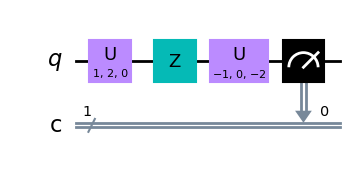

<A> = 0.54039


In [24]:
#from qiskit.circuit.library.standard_gates import U3Gate
M_simulator = Aer.get_backend('qasm_simulator')

'definimos un estado arbitrario en la esfera de Bloch'
theta = 1.  #rad
phi   = 2.  #rad

' el operador unitario que lo genera a partir de |0> es u(theta, phi, 0,0)'
qc_Upsi = QuantumCircuit(1,1)
qc_Upsi.u(theta,phi,0,0)
qc_Upsi.z(0)
#qc_Upsi.x(0)
#qc_Upsi.y(0)
qc_Upsi.u(-theta,0,-phi,0)

qc_Upsi.measure(0,0)

display(qc_Upsi.draw('mpl'))

' ejecutamos '
shots= 100000
counts=execute(qc_Upsi,backend=M_simulator,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_A = np.sqrt(counts['0']/shots)
print('<A> =',np.round(mean_A,5))
